## 신경망
퍼셉트론으로도 복잡한 함수 표현이 가능하다
가중치 매개변수의 적절한 값을 데이터로부터 자동으로 학습하는 능력이 필요하다

## 3.1. 퍼셉트론에서 신경망으로
- Def
    - 입력층, 출력층, 은닉층으로 구분
    - 은닉층은 눈에 보이지 않음
- 퍼셉트론
    - b
        - 편향
        - 뉴런이 얼마나 쉽게 활성화되는가
    - w
        - 가중치
        - 신호의 영향력
    - $y = h(b + w_1 x_1 + w_2x_2)$
        - y = 0 or 1
- 활성화함수
    - Def
        - 입력 신호의 총합을 출력 신호로 변환하는 함수

## 3.2. 활성화 함수
- 계단 함수

In [4]:
def step_function(x):
    ##np.array([arg1, arg2, arg2])
    y = x > 0
    ##np.array([bool1, bool2, bool3])        
    return y.astype(np.int)     ##np.array([1, 0, 1])        

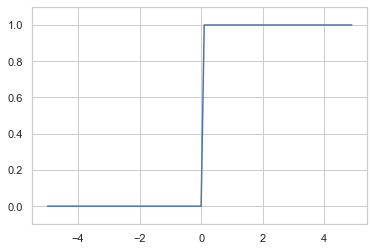

In [9]:
%matplotlib inline
x = np.arange(-5.0, 5.0, 0.1)
y = step_function(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()

- 시그모이드 함수
    - $h(x) = {1 \over 1 + exp(-x)}$
    - 연속함수
        - 미분 가능

In [3]:
def sigmoid(x):
    return 1 /(1 + np.exp(-x))

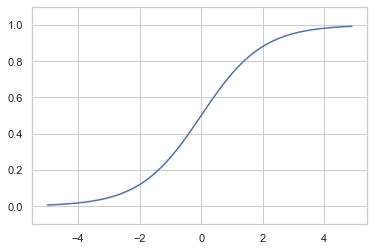

In [11]:
%matplotlib inline
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()

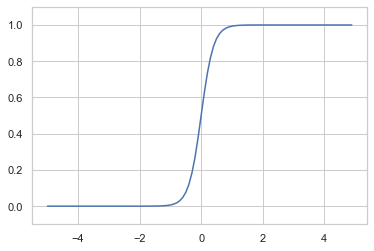

In [18]:
%matplotlib inline
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(5 * x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()

- 비선형 함수
    - Def
        - 선형 vs 비선형
            - 선형
                - 출력이 입력의 상수배
            - 비선형
                - 직선 한개로는 그릴 수 없는 함수
        - 함수
            - 변환기
    - 신경망의 핵심
        - 선형함수는 아무리 깊게 해도 선형 함수이기 대문


- ReLU
    - Def
        - 0을 넘으면 그 입력을 그대로 출력
        - 0 이하이면 0을 출력

In [19]:
def relu(x):
    return np.maximum(0, x)

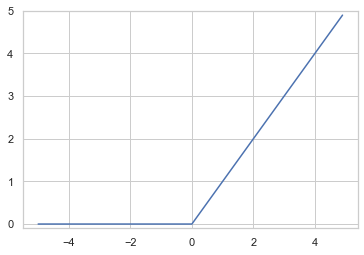

In [23]:
%matplotlib inline
x = np.arange(-5.0, 5.0, 0.1)
y = relu(x)
plt.plot(x, y)
plt.ylim(-0.1, 5)
plt.show()

## 3.3 다차원 배열의 계산

In [24]:
X = np.array([1, 2])
W = np.array([[1,3,5], [2,4,6]])
Y = np.dot(X,W)
Y

array([ 5, 11, 17])

## 3.4. 3층 신경망 구현하기

- notation
    - $w^a_{bc}$
        - a
            - a번째 층
        - b
            - 다음 층의 b번째 뉴런
        - c
            - 앞 층의 c번째 뉴런

In [5]:
def identity_function(x):
    return x

class NN():    
    def __init__(self):
        self.network = {}
        self.W1 = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
        self.b1 = np.array([0.1, 0.2, 0.3])
        self.W2 = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
        self.b2 = np.array([0.1, 0.2])
        self.W3 = np.array([[0.1, 0.3], [0.2, 0.4]])
        self.b3 = np.array([0.1, 0.2])

    def forward(self, x):
        a1 = np.dot(x, self.W1) +  self.b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, self.W2) +  self.b2
        z2 = sigmoid(a2)
        a3 = np.dot(z2, self.W3) +  self.b3
        y = identity_function(a3)
        return y
network = NN()
x = np.array([1.0, 0.5])
y = network.forward(x)
print(y)

[0.31682708 0.69627909]


## 3.5. 출력층 설계하기
- 신경망은 분류와 회귀 모두 사용
    - 회귀
        - 활성화함수로 항등 함수 사용
    - 분류
        - 활성화 함수로 소프트맥스 함수 사용
            - $y_k = {exp(a_k) \over \sum exp(a_i)}$              

In [69]:
def softmax(a):
    exp_a = np.exp(a)
    sum_exp_a = sum(exp_a)
    y = exp_a / sum_exp_a
    return y
softmax([0.3, 2.9, 4.0])

array([0.01821127, 0.24519181, 0.73659691])

### Softmax 함수
- overflow 문제 발생
    - exp에 들어가는 값이 너무 크면 nan이 발생
        - c라는 임의의 정수를 제하여 사용
            - 일반적으로 입력 신호 중 최댓값 이용
    - 특징
        - 출력의 총합이 1
            - 확률로 해석할 수 있음
        - 원소의 대소관계는 변하지 않음
            -단조증가함수이기 때문

In [70]:
softmax([1010, 1000, 990])

array([nan, nan, nan])

In [71]:
def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a - c)
    sum_exp_a = sum(exp_a)
    y = exp_a / sum_exp_a
    return y
result = softmax([0.3, 2.9, 4.0])
print(result)
print(sum(result))

[0.01821127 0.24519181 0.73659691]
1.0


## 3.6. 손글씨 인식

In [138]:
import tensorflow as tf
from tensorflow import keras
from PIL import Image

In [139]:
mnist = keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(60000, 784).astype('float32') / 255.0
X_test  = X_test.reshape(10000, 784).astype('float32') / 255.0

In [140]:
def img_show(img):
    pil_img = Image.fromarray(np.uint8(img))
    pil_img.show()

In [141]:
img = X_train[0]
img = img.reshape(28,28)
label =  y_train[0]
print(label)
img_show(img)

5


- 정규화
    - 데이터를 특정 범위로 변환하는 처리
- 전처리
    - 신경망의 입력 데이터에 특정 변환을 가하는 것
- 

### 배치 처리
- 배치
    - 하나로 묶은 입력 데이터


In [145]:
batch_size = 100
for i in range(0, len(X_train), batch_size):
    x_batch = x[i:i+batch_size]

In [146]:
len(X_train)

60000